In [1]:
%load_ext watermark
%watermark -a 'Atun Anggara' -u -d -v -p numpy,pandas,matplotlib,scikit-learn

Atun Anggara 
last updated: 2017-05-26 

CPython 3.6.0
IPython 5.1.0

numpy 1.11.3
pandas 0.19.2
matplotlib 2.0.0
scikit-learn 0.18.1


/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/watermark/watermark.py:146: DeprecationWarning: Importing scikit-learn as `scikit-learn` has been depracated and will not be supported anymore in v1.7.0. Please use the package name `sklearn` instead.
  DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import urllib.request
#from urllib2 import Request, urlopen, URLError
import json
import requests
#import ijson
from __future__ import division

In [3]:
%matplotlib inline

In [4]:
df_2012 = pd.read_csv('merged_2012_PP.csv', encoding='latin1')
df_2012.head()

/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1517,1532,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,0.440384615385,0.435294117647,0.469199178645,0.40465631929,0.458398744113,0.418864097363,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,0.744820616473,0.814925373134,0.78531598513,0.749778956676,0.760399334443,0.786069651741,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,0.458563535912,0.605263157895,0.465277777778,0.544642857143,0.496,0.514851485149,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,0.726251276813,0.842342342342,0.778034682081,0.767926988266,0.770916334661,0.785009861933,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,0.291703442189,0.39175257732,0.33665480427,0.272277227723,0.279705573081,0.310344827586,NaN,NaN,NaN,NaN


In [5]:
df_2012 = df_2012.replace(r'PrivacySuppressed', np.nan,regex=True)

In [6]:
df_2012.C150_4.isnull().sum()

5370

In [7]:
df_2012.shape

(7793, 1729)

In [8]:
maindf2012 = df_2012.dropna(subset=['C150_4'])

In [9]:
maindf2012.shape

(2423, 1729)

In [10]:
maindf2012=maindf2012[maindf2012.main==1]

In [11]:
maindf2012.shape

(2003, 1729)

In [12]:
maindf2012.C150_4.isnull().sum()

0

In [13]:
maindf2012 = maindf2012.drop('main', 1)

In [14]:
# have >95% to reduce the amount of features being used to see the accuracy
cleaneddf = maindf2012.dropna(thresh=1902,axis=1)

In [15]:
cleaneddf.isnull().sum()

UNITID             0
OPEID              0
opeid6             0
INSTNM             0
CITY               0
STABBR             0
ZIP                0
sch_deg            0
NUMBRANCH          0
PREDDEG            0
HIGHDEG            0
CONTROL            0
st_fips            0
region             0
PCIP01             1
PCIP03             1
PCIP04             1
PCIP05             1
PCIP09             1
PCIP10             1
PCIP11             1
PCIP12             1
PCIP13             1
PCIP14             1
PCIP15             1
PCIP16             1
PCIP19             1
PCIP22             1
PCIP23             1
PCIP24             1
                  ..
UGDS_ASIAN         0
UGDS_AIAN          0
UGDS_NHPI          0
UGDS_2MOR          0
UGDS_NRA           0
UGDS_UNKN          0
PPTUG_EF           2
COSTT4_A          39
TUITIONFEE_IN     35
TUITIONFEE_OUT    35
TUITFTE            0
INEXPFTE           0
AVGFACSAL         35
PCTPELL            2
C150_4             0
PFTFTUG1_EF       79
D150_4       

In [16]:
cleaneddf.shape

(2003, 277)

In [17]:
cleaneddf.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg,NUMBRANCH,PREDDEG,...,CDR3,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,1,3,...,0.165,1334,1257,1253,1259,1336,3044,3044,1788,2182
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,3,...,0.070,2724,2407,2101,2217,2450,5990,5990,3681,4495
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,1,3,...,0.075,171,167,149,170,145,528,528,266,406
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,3,...,0.084,1155,1322,1242,1054,1018,2652,2652,1607,1934
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0,1,3,...,0.190,1418,1723,1667,1718,1498,3814,3814,2579,3176


In [18]:
# http://stackoverflow.com/questions/38936854/categorize-data-in-a-column-in-dataframe
bin_df = pd.cut(cleaneddf['C150_4'], bins=[0, 0.3, 0.4, 0.5,0.6,0.7,1], include_lowest=True,labels=[6,5,4,3,2,1])
bin_df

0       5
1       4
2       6
3       4
4       6
5       2
8       5
9       2
10      2
12      6
16      5
23      4
24      6
26      6
30      5
32      5
35      6
36      4
37      4
39      5
41      5
46      1
47      4
50      5
51      2
52      5
53      6
54      6
56      5
57      4
       ..
6127    1
6151    6
6206    6
6227    6
6236    4
6245    4
6325    4
6329    5
6337    4
6362    6
6363    6
6387    6
6447    3
6532    2
6570    2
6718    3
6849    1
6898    6
6986    5
6991    1
7025    6
7057    5
7105    2
7220    6
7250    6
7253    1
7303    4
7312    4
7314    1
7376    6
Name: C150_4, dtype: category
Categories (6, int64): [6 < 5 < 4 < 3 < 2 < 1]

In [19]:
cleaneddf = cleaneddf.assign(categories=bin_df.values)

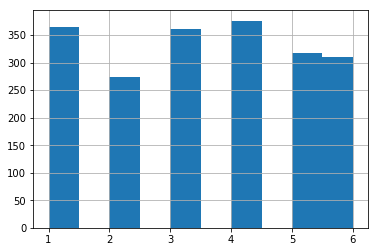

In [20]:
cleaneddf.categories.hist()

In [21]:
cleaneddf.to_csv('cleaneddf_week7.csv', encoding='utf-8',index=False)

In [22]:
cleaneddf = pd.read_csv('cleaneddf_week7.csv', encoding='utf-8')

In [23]:
cleaneddf.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg,NUMBRANCH,PREDDEG,...,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N,categories
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,1,3,...,1334.0,1257.0,1253.0,1259.0,1336.0,3044.0,3044.0,1788.0,2182.0,5
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,3,...,2724.0,2407.0,2101.0,2217.0,2450.0,5990.0,5990.0,3681.0,4495.0,4
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,1,3,...,171.0,167.0,149.0,170.0,145.0,528.0,528.0,266.0,406.0,6
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,3,...,1155.0,1322.0,1242.0,1054.0,1018.0,2652.0,2652.0,1607.0,1934.0,4
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0,1,3,...,1418.0,1723.0,1667.0,1718.0,1498.0,3814.0,3814.0,2579.0,3176.0,6


In [24]:
list(cleaneddf.columns.values)

['UNITID',
 'OPEID',
 'opeid6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'sch_deg',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'st_fips',
 'region',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01CERT1',
 'CIP01CERT2',
 'CIP01ASSOC',
 'CIP01CERT4',
 'CIP01BACHL',
 'CIP03CERT1',
 'CIP03CERT2',
 'CIP03ASSOC',
 'CIP03CERT4',
 'CIP03BACHL',
 'CIP04CERT1',
 'CIP04CERT2',
 'CIP04ASSOC',
 'CIP04CERT4',
 'CIP04BACHL',
 'CIP05CERT1',
 'CIP05CERT2',
 'CIP05ASSOC',
 'CIP05CERT4',
 'CIP05BACHL',
 'CIP09CERT1',
 'CIP09CERT2',
 'CIP09ASSOC',
 'CIP09CERT4',
 'CIP09BACHL',
 'CIP10CERT1',
 'CIP10CERT2',
 'CIP10ASSOC',
 'CIP1

For feature selections, I separate the dataframe into two: numeric and named data frame. 

Grabbing the column that has only numeric values:

In [25]:
num_df = cleaneddf.iloc[:,8:]
num_df.head()

,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,PCIP01,PCIP03,PCIP04,PCIP05,...,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N,categories
0,1,3,4,1,1,5,0.0451,0.015,0.0075,0.000,...,1334.0,1257.0,1253.0,1259.0,1336.0,3044.0,3044.0,1788.0,2182.0,5
1,1,3,4,1,1,5,0.0000,0.000,0.0000,0.002,...,2724.0,2407.0,2101.0,2217.0,2450.0,5990.0,5990.0,3681.0,4495.0,4
2,1,3,4,2,1,5,0.0000,0.000,0.0000,0.000,...,171.0,167.0,149.0,170.0,145.0,528.0,528.0,266.0,406.0,6
3,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,1155.0,1322.0,1242.0,1054.0,1018.0,2652.0,2652.0,1607.0,1934.0,4
4,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,1418.0,1723.0,1667.0,1718.0,1498.0,3814.0,3814.0,2579.0,3176.0,6


In [26]:
named_df = cleaneddf.loc[:,'UNITID':'sch_deg']
named_df.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0


In [27]:
Y_target= num_df.loc[:,"categories"].values

In [28]:
num_df.categories.head()

0    5
1    4
2    6
3    4
4    6
Name: categories, dtype: int64

In [29]:
X_values = num_df.drop(['C150_4','categories'],1)
X_values.head()

,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,PCIP01,PCIP03,PCIP04,PCIP05,...,CDR3,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N
0,1,3,4,1,1,5,0.0451,0.015,0.0075,0.000,...,0.165,1334.0,1257.0,1253.0,1259.0,1336.0,3044.0,3044.0,1788.0,2182.0
1,1,3,4,1,1,5,0.0000,0.000,0.0000,0.002,...,0.070,2724.0,2407.0,2101.0,2217.0,2450.0,5990.0,5990.0,3681.0,4495.0
2,1,3,4,2,1,5,0.0000,0.000,0.0000,0.000,...,0.075,171.0,167.0,149.0,170.0,145.0,528.0,528.0,266.0,406.0
3,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,0.084,1155.0,1322.0,1242.0,1054.0,1018.0,2652.0,2652.0,1607.0,1934.0
4,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,0.190,1418.0,1723.0,1667.0,1718.0,1498.0,3814.0,3814.0,2579.0,3176.0


In [30]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(X_values)
imputed_data = imr.transform(X_values.values)
imputed_data

array([[  1.00000000e+00,   3.00000000e+00,   4.00000000e+00, ...,
          3.04400000e+03,   1.78800000e+03,   2.18200000e+03],
       [  1.00000000e+00,   3.00000000e+00,   4.00000000e+00, ...,
          5.99000000e+03,   3.68100000e+03,   4.49500000e+03],
       [  1.00000000e+00,   3.00000000e+00,   4.00000000e+00, ...,
          5.28000000e+02,   2.66000000e+02,   4.06000000e+02],
       ..., 
       [  1.00000000e+00,   3.00000000e+00,   3.00000000e+00, ...,
          3.27191138e+03,   2.06512231e+03,   2.52738784e+03],
       [  1.00000000e+00,   3.00000000e+00,   3.00000000e+00, ...,
          3.27191138e+03,   2.06512231e+03,   2.52738784e+03],
       [  2.30000000e+01,   3.00000000e+00,   4.00000000e+00, ...,
          3.46780000e+04,   2.59250000e+04,   2.91890000e+04]])

In [31]:
imputed_data.shape

(2003, 268)

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(imputed_data, Y_target, test_size=0.3, random_state=0)

/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


 1) C150_4_WHITE                   0.119067
 2) CDR3                           0.034313
 3) PCTPELL                        0.033342
 4) CDR2                           0.030431
 5) TUITIONFEE_OUT                 0.027276
 6) TUITIONFEE_IN                  0.022899
 7) COSTT4_A                       0.022289
 8) INEXPFTE                       0.021964
 9) PPTUG_EF                       0.021894
10) PFTFTUG1_EF                    0.020482
11) AVGFACSAL                      0.020267
12) TUITFTE                        0.018191
13) UGDS_BLACK                     0.017458
14) UGDS_WHITE                     0.016500
15) D150_4                         0.015536
16) PCTFLOAN                       0.015183
17) UGDS_ASIAN                     0.014668
18) UGDS_HISP                      0.012958
19) UGDS                           0.012612
20) UGDS_NRA                       0.011259
21) UGDS_2MOR                      0.011250
22) UGDS_AIAN                      0.011142
23) OVERALL_YR6_N               

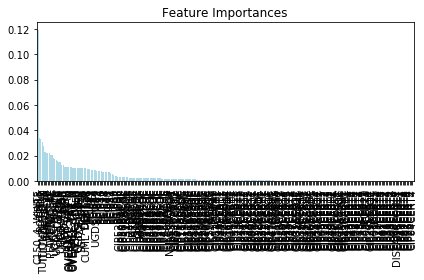

In [33]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_values.columns

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [34]:
#http://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train, y_train)
sfm.transform(imputed_data).shape[1]

33

In [35]:
sfm.transform(imputed_data)

array([[  6.95000000e-02,   7.50000000e-03,   2.16200000e-01, ...,
          1.33600000e+03,   1.78800000e+03,   2.18200000e+03],
       [  4.83000000e-02,   3.98000000e-02,   1.67800000e-01, ...,
          2.45000000e+03,   3.68100000e+03,   4.49500000e+03],
       [  0.00000000e+00,   0.00000000e+00,   2.86000000e-02, ...,
          1.45000000e+02,   2.66000000e+02,   4.06000000e+02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.14294922e+03,   2.06512231e+03,   2.52738784e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.14294922e+03,   2.06512231e+03,   2.52738784e+03],
       [  8.70000000e-03,   7.00000000e-03,   2.29000000e-01, ...,
          1.32720000e+04,   2.59250000e+04,   2.91890000e+04]])

In [36]:
feat_labels[indices]

Index(['C150_4_WHITE', 'CDR3', 'PCTPELL', 'CDR2', 'TUITIONFEE_OUT',
       'TUITIONFEE_IN', 'COSTT4_A', 'INEXPFTE', 'PPTUG_EF', 'PFTFTUG1_EF',
       ...
       'CIP25CERT1', 'CIP29CERT1', 'CIP41CERT4', 'CIP29CERT4', 'CIP01CERT4',
       'CIP12CERT4', 'CIP03CERT4', 'CIP25CERT4', 'CIP29CERT2', 'CIP04CERT4'],
      dtype='object', length=268)

In [37]:
selcol = feat_labels[indices[:33]]
selcol

Index(['C150_4_WHITE', 'CDR3', 'PCTPELL', 'CDR2', 'TUITIONFEE_OUT',
       'TUITIONFEE_IN', 'COSTT4_A', 'INEXPFTE', 'PPTUG_EF', 'PFTFTUG1_EF',
       'AVGFACSAL', 'TUITFTE', 'UGDS_BLACK', 'UGDS_WHITE', 'D150_4',
       'PCTFLOAN', 'UGDS_ASIAN', 'UGDS_HISP', 'UGDS', 'UGDS_NRA', 'UGDS_2MOR',
       'UGDS_AIAN', 'OVERALL_YR6_N', 'OVERALL_YR3_N', 'OVERALL_YR2_N',
       'OVERALL_YR4_N', 'OVERALL_YR8_N', 'REPAY_DT_N', 'PCIP50', 'UGDS_UNKN',
       'PCIP52', 'SEPAR_DT_N', 'PCIP45'],
      dtype='object')

In [38]:
X_sel_values = X_values.loc[:,selcol]
X_sel_values.head()

,C150_4_WHITE,CDR3,PCTPELL,CDR2,TUITIONFEE_OUT,TUITIONFEE_IN,COSTT4_A,INEXPFTE,PPTUG_EF,PFTFTUG1_EF,...,OVERALL_YR3_N,OVERALL_YR2_N,OVERALL_YR4_N,OVERALL_YR8_N,REPAY_DT_N,PCIP50,UGDS_UNKN,PCIP52,SEPAR_DT_N,PCIP45
0,0.2500,0.165,0.7011,0.114,12774.0,7182.0,17351.0,8511.0,0.0762,0.8548,...,1257.0,1334.0,1253.0,1336.0,1788.0,0.0075,0.0088,0.2162,2182.0,0.0695
1,0.5083,0.070,0.3680,0.060,15462.0,6798.0,20441.0,17063.0,0.2533,0.5303,...,2407.0,2724.0,2101.0,2450.0,3681.0,0.0398,0.0203,0.1678,4495.0,0.0483
2,0.0000,0.075,0.8688,0.071,6800.0,6800.0,11420.0,4520.0,0.3728,0.6923,...,167.0,171.0,149.0,145.0,266.0,0.0000,0.3462,0.0286,406.0,0.0000
3,0.4873,0.084,0.3345,0.077,21108.0,8794.0,19687.0,9317.0,0.2271,0.4289,...,1322.0,1155.0,1242.0,1018.0,1607.0,0.0498,0.0312,0.2279,1934.0,0.0157
4,0.5000,0.190,0.7752,0.132,14244.0,7932.0,17533.0,8100.0,0.0859,0.8543,...,1723.0,1418.0,1667.0,1498.0,2579.0,0.0406,0.0150,0.1365,3176.0,0.0074


In [39]:
X_sel_values.shape

(2003, 33)

In [40]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(X_sel_values)
imputed_data2 = imr.transform(X_sel_values.values)

In [41]:
from sklearn.cross_validation import train_test_split
X_train2, X_test2, y_train2, y_test2 = \
        train_test_split(imputed_data2, Y_target, test_size=0.3, random_state=0)

 1) C150_4_WHITE                   0.250006
 2) CDR3                           0.050801
 3) PCTPELL                        0.049604
 4) CDR2                           0.041943
 5) TUITIONFEE_OUT                 0.039724
 6) PPTUG_EF                       0.032314
 7) INEXPFTE                       0.029814
 8) TUITIONFEE_IN                  0.029807
 9) PFTFTUG1_EF                    0.028412
10) COSTT4_A                       0.027565
11) AVGFACSAL                      0.027183
12) UGDS_WHITE                     0.024789
13) UGDS_BLACK                     0.024374
14) D150_4                         0.023347
15) TUITFTE                        0.022501
16) PCTFLOAN                       0.021609
17) UGDS_HISP                      0.019963
18) UGDS_ASIAN                     0.019685
19) UGDS                           0.018073
20) UGDS_AIAN                      0.017440
21) PCIP50                         0.017188
22) PCIP52                         0.017105
23) UGDS_NRA                    

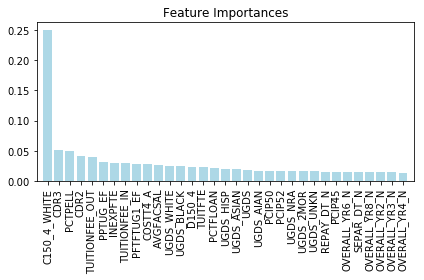

In [42]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_sel_values.columns

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train2, y_train2)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train2.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train2.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train2.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train2.shape[1]])
plt.tight_layout()
plt.savefig('./ProjectFinal/FeatureImportance.png', dpi=300)
plt.show()

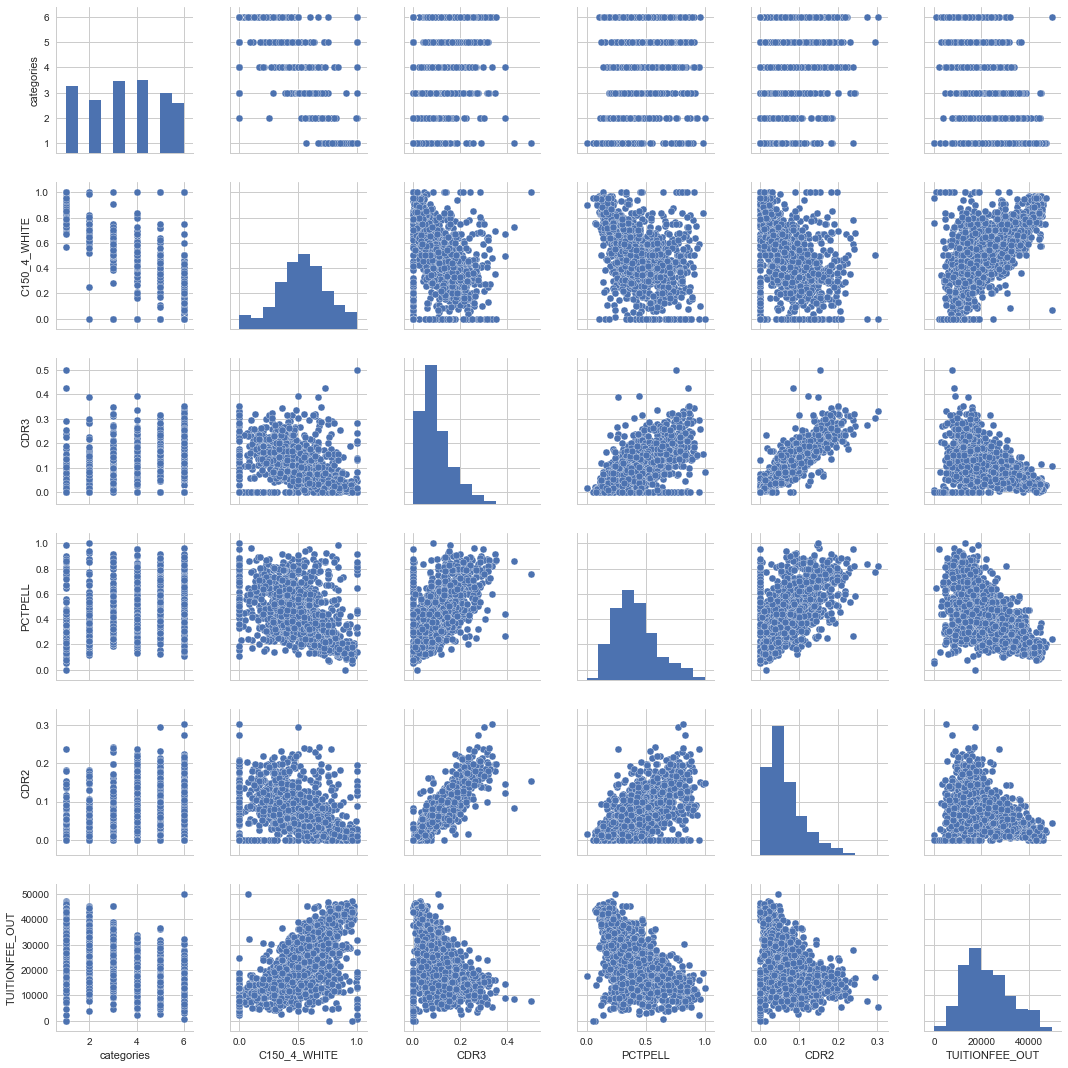

In [43]:
# when I did feature selections, I saw that the most correlated features are similar in nature, so I 
# wanted to run a pair plot analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['categories', 'C150_4_WHITE', 'CDR3', 'PCTPELL', 'CDR2','TUITIONFEE_OUT']

sns.pairplot(cleaneddf[cols].dropna(), size=2.5)
plt.tight_layout()
plt.savefig('./ProjectFinal/EDA_Top5.png', dpi=300)
plt.show()

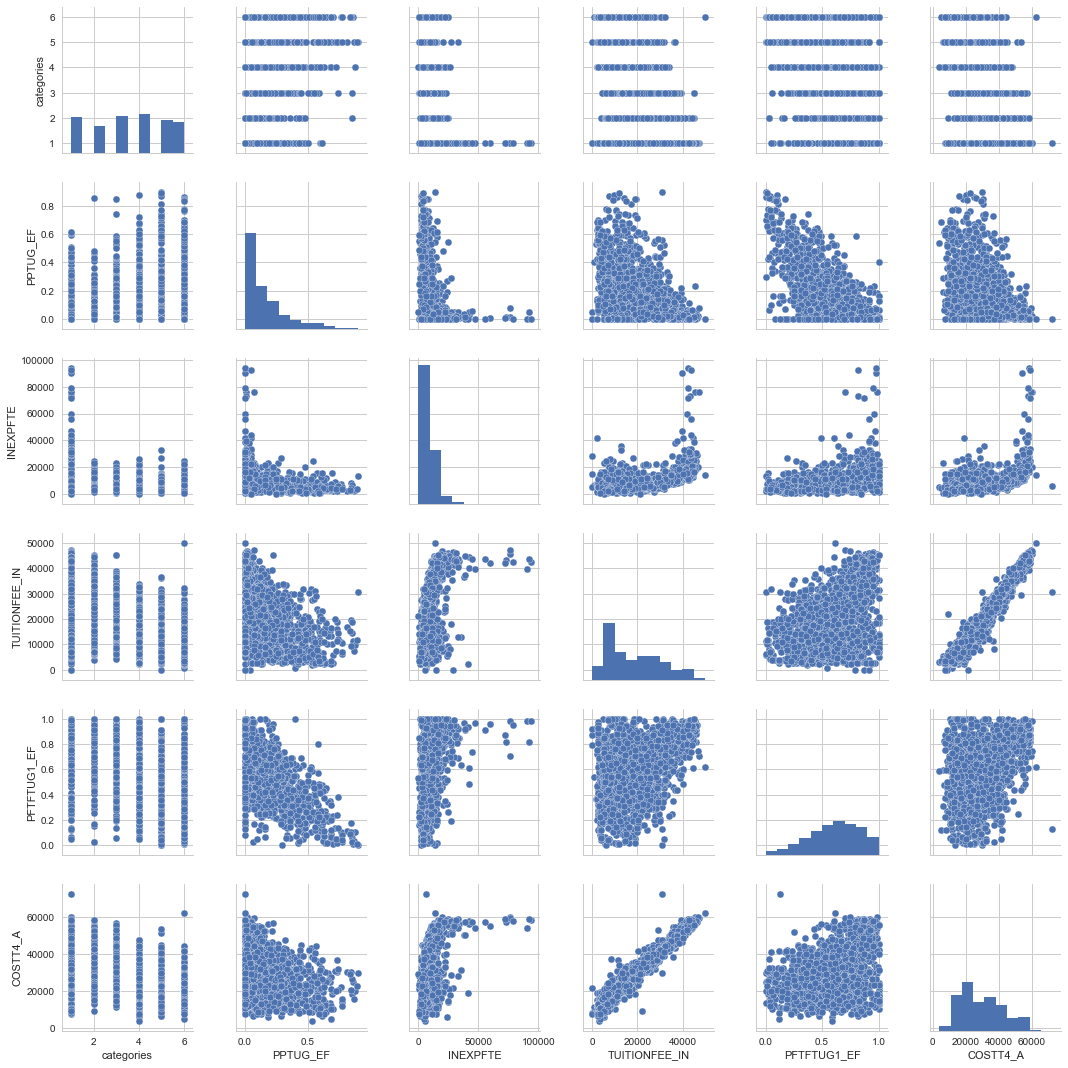

In [44]:
# when I did feature selections, I saw that the most correlated features are similar in nature, so I 
# wanted to run a pair plot analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['categories', 'PPTUG_EF','INEXPFTE','TUITIONFEE_IN','PFTFTUG1_EF','COSTT4_A']

sns.pairplot(cleaneddf[cols].dropna(), size=2.5)
plt.tight_layout()
plt.savefig('./ProjectFinal/EDA_Bottom5.png', dpi=300)
plt.show()

# Decision Tree Algorithm

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, min_samples_split=20)
tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree_selection.dot', 
                feature_names=X_sel_values.columns)

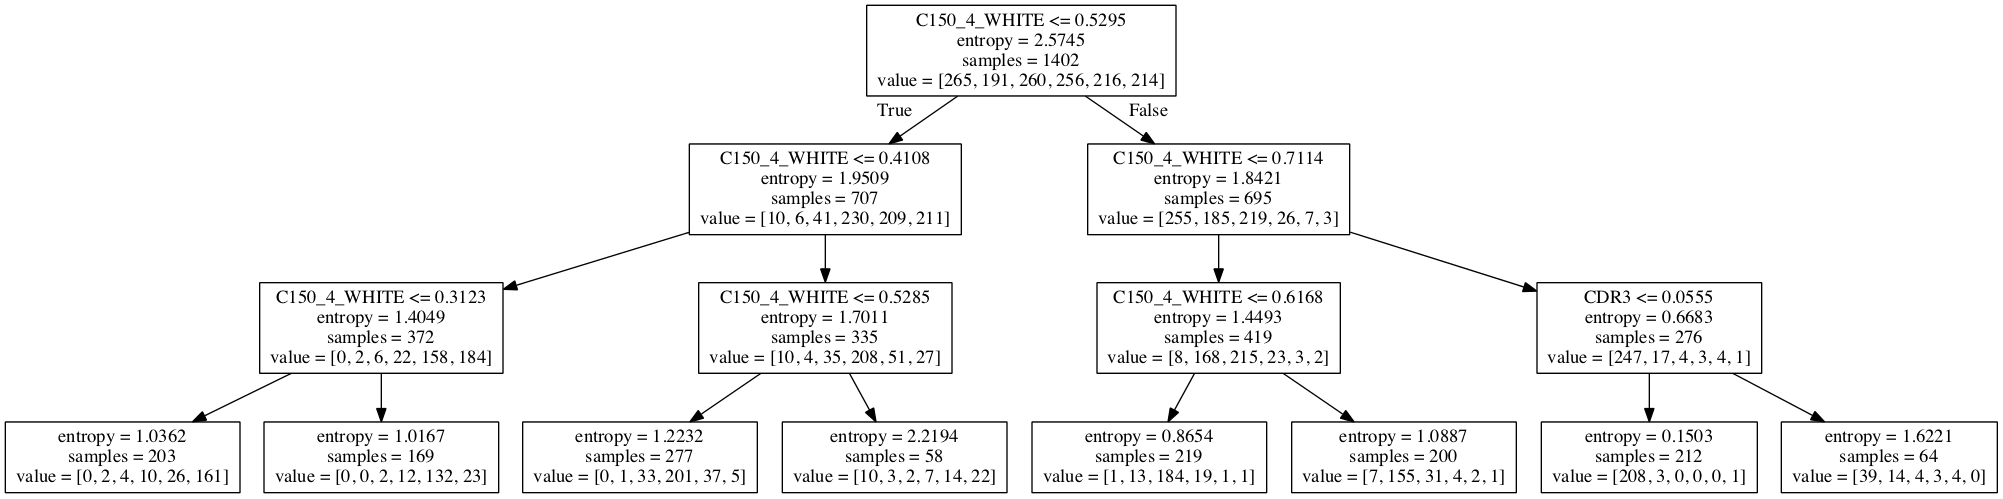

In [47]:
from IPython.display import Image
Image(filename='./tree.png', width=2400) 

In [48]:
from sklearn.cross_validation import  cross_val_score
scores = cross_val_score(tree, X_train2, y_train2, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.778 (std: 0.023)



http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

In [49]:
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import RandomizedSearchCV

/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [50]:
def run_gridsearch(X, y, clf, param_grid, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [51]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [52]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce pseudo-code for decision tree.

    Args
    ----
    tree -- scikit-leant Decision Tree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse (left, right, threshold, features,
                             left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse (left, right, threshold, features,
                             right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [53]:
print("-- Grid Parameter Search via 10-fold CV")

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dt = DecisionTreeClassifier()
ts_gs = run_gridsearch(X_train2, y_train2, dt, param_grid, cv=10)

-- Grid Parameter Search via 10-fold CV

GridSearchCV took 78.68 seconds for 288 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.778 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.778 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.778 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}



In [54]:
print("\n-- Best Parameters:")
for k, v in ts_gs.items():
    print("parameter: {:<20s} setting: {}".format(k, v))


-- Best Parameters:
parameter: criterion            setting: entropy
parameter: max_depth            setting: None
parameter: max_leaf_nodes       setting: 10
parameter: min_samples_leaf     setting: 1
parameter: min_samples_split    setting: 2


In [55]:
# test the retuned best parameters
print("\n\n-- Testing best parameters [Grid]...")
dt_ts_gs = DecisionTreeClassifier(**ts_gs)
scores = cross_val_score(dt_ts_gs, X_train2, y_train2, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )



-- Testing best parameters [Grid]...
mean: 0.778 (std: 0.023)



In [56]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas Data Frame.
    target_column -- column to map to int, producing new
                     Target column.

    Returns
    -------
    df -- modified Data Frame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)


In [101]:
#df, targets = encode_target(X_sel_values,"categories")

In [57]:
print("\n-- get_code for best parameters [Grid]:", end="\n\n")
dt_ts_gs.fit(X_train2,y_train2)
get_code(dt_ts_gs, selcol, Y_target)


-- get_code for best parameters [Grid]:

if ( C150_4_WHITE <= 0.529500007629 ) {
    if ( C150_4_WHITE <= 0.410849988461 ) {
        if ( C150_4_WHITE <= 0.312299996614 ) {
            if ( UGDS_WHITE <= 0.126350000501 ) {
                return 4 ( 2 examples )
                return 6 ( 4 examples )
                return 4 ( 8 examples )
                return 6 ( 14 examples )
                return 2 ( 27 examples )
            }
            else {
                return 4 ( 2 examples )
                return 6 ( 12 examples )
                return 2 ( 134 examples )
            }
        }
        else {
            return 6 ( 2 examples )
            return 4 ( 12 examples )
            return 6 ( 132 examples )
            return 2 ( 23 examples )
        }
    }
    else {
        if ( C150_4_WHITE <= 0.528451681137 ) {
            if ( C150_4_WHITE <= 0.497200012207 ) {
                return 6 ( 4 examples )
                return 4 ( 154 examples )
                return

In [58]:
def visualize_tree(tree, feature_names, fn="dt"):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn Decision Tree.
    feature_names -- list of feature names.
    fn -- [string], root of filename, default `dt`.
    """
    dotfile = fn + ".dot"
    pngfile = fn + ".png"

    with open(dotfile, 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", dotfile, "-o", pngfile]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, "
             "to produce visualization")

In [59]:
visualize_tree(dt_ts_gs, selcol, fn="grid_best")

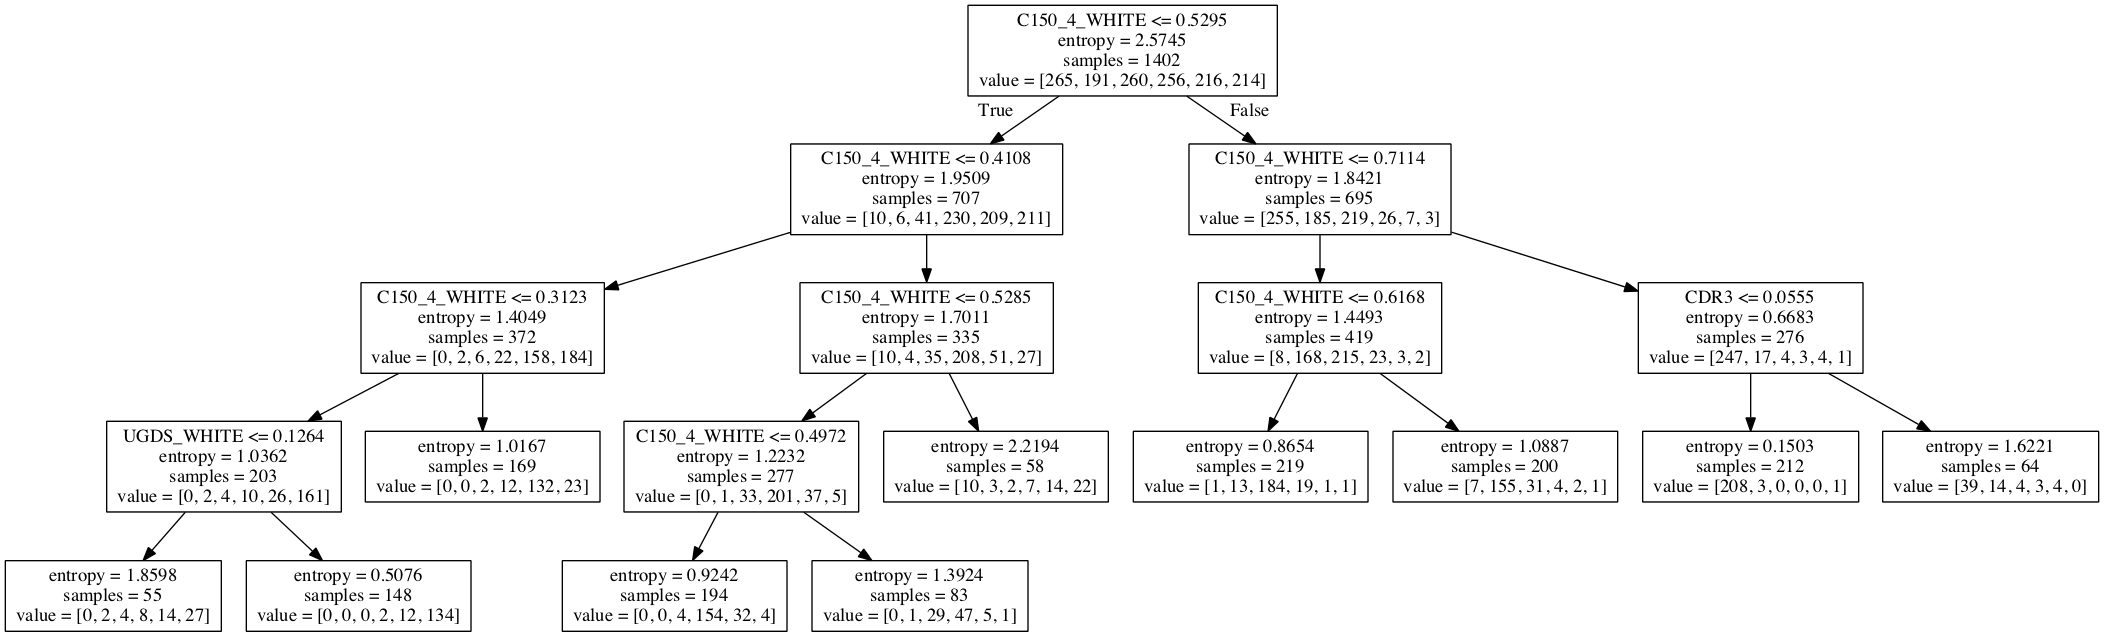

In [60]:
from IPython.display import Image
Image(filename='./grid_best.png', width=2400) 

In [61]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=20):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [63]:
print("-- Random Parameter Search via 10-fold CV")

# dict of parameter list/distributions to sample
param_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(1, 20),
              "max_depth": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(2, 20)}

dt = DecisionTreeClassifier()
ts_rs = run_randomsearch(X_train2,y_train2, dt, param_dist, cv=10,
                         n_iter_search=19)

-- Random Parameter Search via 10-fold CV

RandomizedSearchCV took 1.32 seconds for 19 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.773 (std: 0.004)
Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_leaf': 17, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.773 (std: 0.004)
Parameters: {'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 14, 'min_samples_leaf': 19, 'min_samples_split': 18}

Model with rank: 3
Mean validation score: 0.772 (std: 0.005)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 11, 'min_samples_leaf': 19, 'min_samples_split': 6}



In [64]:
print("\n-- Best Parameters:")
for k, v in ts_rs.items():
    print("parameters: {:<20s} setting: {}".format(k, v))



-- Best Parameters:
parameters: criterion            setting: entropy
parameters: max_depth            setting: 7
parameters: max_leaf_nodes       setting: 15
parameters: min_samples_leaf     setting: 17
parameters: min_samples_split    setting: 4


In [65]:
# test the retuned best parameters
print("\n\n-- Testing best parameters [Random]...")
dt_ts_rs = DecisionTreeClassifier(**ts_rs)
scores = cross_val_score(dt_ts_rs, X_train, y_train, cv=10)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )



-- Testing best parameters [Random]...
mean: 0.773 (std: 0.024)



In [66]:
print("\n-- get_code for best parameters [Random]:")
dt_ts_rs.fit(X_train2,y_train2)
get_code(dt_ts_rs, selcol, Y_target)


-- get_code for best parameters [Random]:
if ( C150_4_WHITE <= 0.529500007629 ) {
    if ( C150_4_WHITE <= 0.410849988461 ) {
        if ( C150_4_WHITE <= 0.312299996614 ) {
            if ( UGDS_WHITE <= 0.126350000501 ) {
                return 4 ( 2 examples )
                return 6 ( 4 examples )
                return 4 ( 8 examples )
                return 6 ( 14 examples )
                return 2 ( 27 examples )
            }
            else {
                return 4 ( 2 examples )
                return 6 ( 12 examples )
                return 2 ( 134 examples )
            }
        }
        else {
            if ( C150_4_WHITE <= 0.374199986458 ) {
                return 4 ( 1 examples )
                return 6 ( 73 examples )
                return 2 ( 21 examples )
            }
            else {
                return 6 ( 2 examples )
                return 4 ( 11 examples )
                return 6 ( 59 examples )
                return 2 ( 2 examples )
         

In [67]:
visualize_tree(dt_ts_rs, selcol, fn="rand_best")

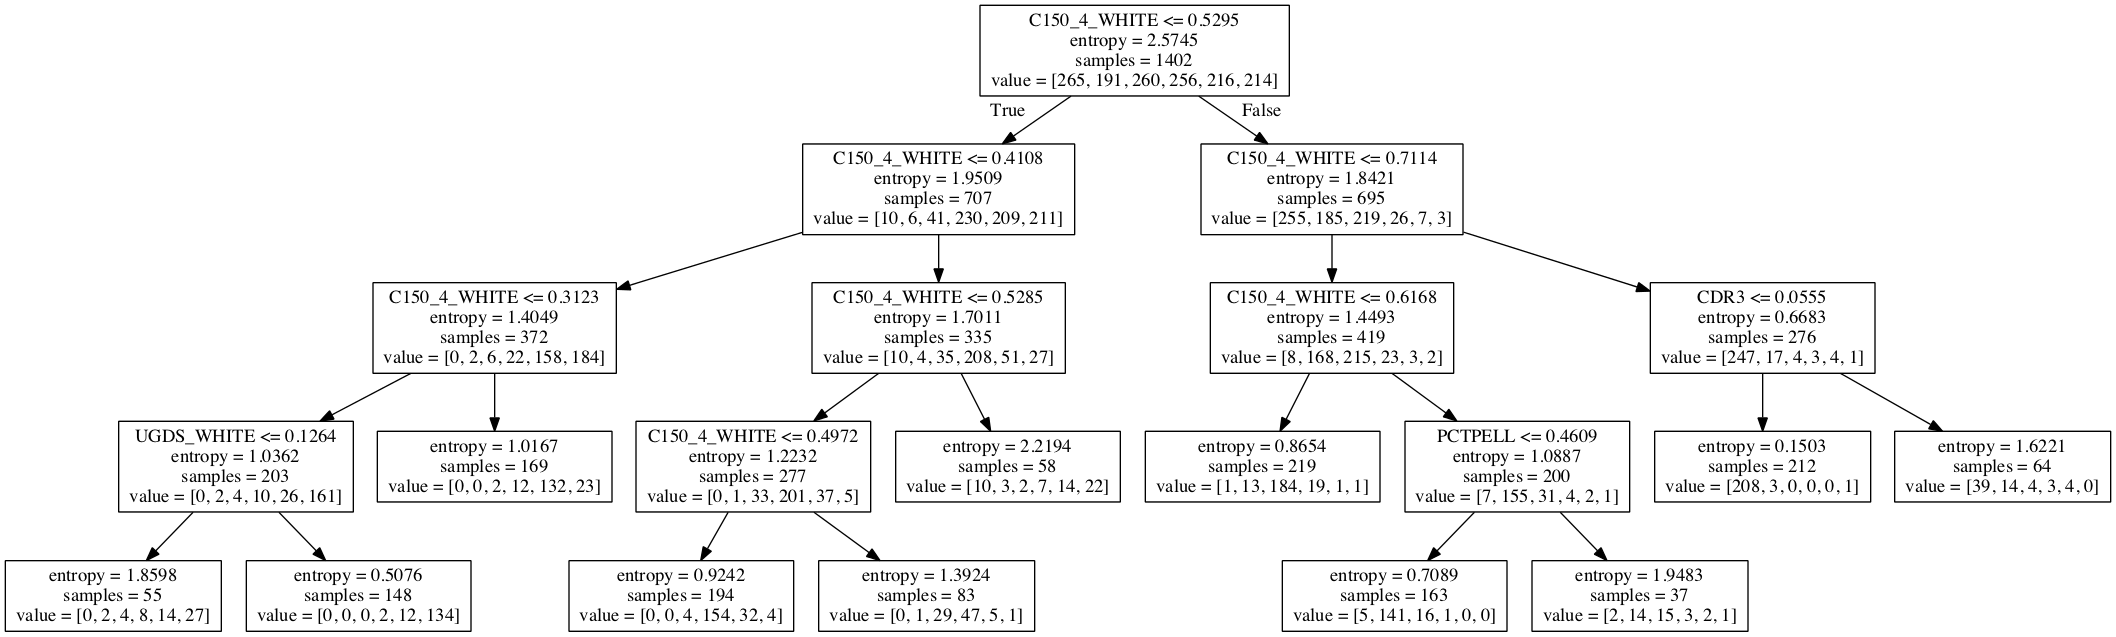

In [68]:
from IPython.display import Image
Image(filename='./rand_best.png', width=2400) 

In [69]:
print('Test Accuracy: %.3f' % tree.score(X_test2, y_test2))

Test Accuracy: 0.772


In [70]:
print('Test Accuracy: %.3f' % tree.score(X_train2, y_train2))

Test Accuracy: 0.786


# Random Forest Algorithm

In [71]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train2, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    forest.fit(X_train2[train], y_train2[train])
    score = forest.score(X_train2[test], y_train2[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train2[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [  0 238 171 234 230 194 192], Acc: 0.762
Fold: 2, Class dist.: [  0 238 172 234 230 194 192], Acc: 0.746
Fold: 3, Class dist.: [  0 238 172 234 230 194 192], Acc: 0.831
Fold: 4, Class dist.: [  0 238 172 234 230 194 192], Acc: 0.746
Fold: 5, Class dist.: [  0 238 172 234 230 194 193], Acc: 0.723
Fold: 6, Class dist.: [  0 239 172 234 230 194 193], Acc: 0.686
Fold: 7, Class dist.: [  0 239 172 234 231 195 193], Acc: 0.761
Fold: 8, Class dist.: [  0 239 172 234 231 195 193], Acc: 0.775
Fold: 9, Class dist.: [  0 239 172 234 231 195 193], Acc: 0.688
Fold: 10, Class dist.: [  0 239 172 234 231 195 193], Acc: 0.804

CV accuracy: 0.752 +/- 0.044


In [142]:
#def softmax(z): 
#    return np.exp(z) / np.sum(np.exp(z))
#
#def softmax_activation(X, w):
#    z = net_input(X, w)
#    return softmax(z)

In [144]:
#y_probas = softmax(Z)
#print('Probabilities:\n', y_probas)

# Logistic Regression Algorithm

In [75]:
import theano 

theano.config.floatX = 'float32'
X_train = X_train2.astype(theano.config.floatX)
X_test = X_test2.astype(theano.config.floatX)

In [77]:
from keras.utils import np_utils

print('First 3 labels: ', y_train2[:3])

y_train_ohe = np_utils.to_categorical(y_train2) 
print('\nFirst 3 labels (one-hot):\n', y_train_ohe[:3])

Using Theano backend.


First 3 labels:  [4 6 3]

First 3 labels (one-hot):
 [[ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.]]


In [78]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1) 

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=y_train_ohe.shape[1], 
                init='uniform', 
                activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

model.fit(X_train, y_train_ohe, 
          nb_epoch=50, 
          batch_size=300, 
          verbose=1, 
          validation_split=0.1)

/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=33, activation="tanh", units=50, kernel_initializer="uniform")`
/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="tanh", units=50, kernel_initializer="uniform")`
/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=7, kernel_initializer="uniform")`
/Users/tanggara/anaconda/envs/py3k/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1261 samples, validate on 141 samples
Epoch 1/50
1261/1261 [==============================] - 0s - loss: 1.9544 - acc: 0.0650 - val_loss: 1.9539 - val_acc: 0.1064
Epoch 2/50
1261/1261 [==============================] - 0s - loss: 1.9499 - acc: 0.1190 - val_loss: 1.9461 - val_acc: 0.1489
Epoch 3/50
1261/1261 [==============================] - 0s - loss: 1.9413 - acc: 0.1808 - val_loss: 1.9364 - val_acc: 0.1773
Epoch 4/50
1261/1261 [==============================] - 0s - loss: 1.9343 - acc: 0.1824 - val_loss: 1.9282 - val_acc: 0.2057
Epoch 5/50
1261/1261 [==============================] - 0s - loss: 1.9270 - acc: 0.2165 - val_loss: 1.9222 - val_acc: 0.1702
Epoch 6/50
1261/1261 [==============================] - 0s - loss: 1.9231 - acc: 0.

In [79]:
y_train_pred = model.predict_classes(X_train, verbose=0)
print('First 3 predictions: ', y_train_pred[:3])

First 3 predictions:  [1 1 1]


In [80]:
train_acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

Training accuracy: 19.26%


In [82]:
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
            #('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train2)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test2))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.509


In [83]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test2))
pred = clf.predict(X_test)

Test Accuracy: 0.509


# Support Vector Machine Algorithm

In [84]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train2)
print(gs.best_score_)
print(gs.best_params_)

0.7089871611982882
{'clf__C': 1000.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


In [85]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.707


In [86]:
print('Test accuracy: %.3f' % clf.score(X_train, y_train))

Test accuracy: 0.852
